In [1]:
#Libraries

import tkinter as tk
import pandas as pd
import numpy as np

from tkinter import filedialog
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load IRIS Dataset

def get_path():
    root = tk.Tk()
    dirname = filedialog.askopenfilename(parent=root,initialdir="/",title='Please select a directory')
    root.withdraw()
    return dirname
def load_dataset():
    dir_name = get_path()
    dataset = pd.read_csv(dir_name)
    return dataset
iris = load_dataset()

In [3]:
# Encode Categories

def encode_category(x):
    if x == "Iris-setosa":
        return 0;
    elif x == "Iris-versicolor":
        return 1
    elif x == "Iris-virginica":
        return 2
iris["species_category"] = iris["species"].apply(encode_category)
del iris["species"]

In [4]:
#Perform one hot encoding

iris['Setosa'] = 0
iris['Versicolor'] = 0
iris['Virginica'] = 0
labels = iris["species_category"] == 0
iris.loc[labels,'Setosa'] = 1
labels_v = iris["species_category"] == 1
iris.loc[labels_v,'Versicolor'] = 1
labels_vir = iris['species_category'] == 2
iris.loc[labels_vir,'Virginica'] = 1

In [5]:
#Normalize Data

def normalize(dataset):
    dataNorm=((dataset-dataset.min())/(dataset.max()-dataset.min()))
    dataNorm["species_category"]=dataset["species_category"]
    return dataNorm
iris = normalize(iris)
iris

,sepal_length,sepal_width,petal_length,petal_width,species_category,Setosa,Versicolor,Virginica
0,0.222222,0.625000,0.067797,0.041667,0,1.0,0.0,0.0
1,0.166667,0.416667,0.067797,0.041667,0,1.0,0.0,0.0
2,0.111111,0.500000,0.050847,0.041667,0,1.0,0.0,0.0
3,0.083333,0.458333,0.084746,0.041667,0,1.0,0.0,0.0
4,0.194444,0.666667,0.067797,0.041667,0,1.0,0.0,0.0
5,0.305556,0.791667,0.118644,0.125000,0,1.0,0.0,0.0
6,0.083333,0.583333,0.067797,0.083333,0,1.0,0.0,0.0
7,0.194444,0.583333,0.084746,0.041667,0,1.0,0.0,0.0
8,0.027778,0.375000,0.067797,0.041667,0,1.0,0.0,0.0
9,0.166667,0.458333,0.084746,0.000000,0,1.0,0.0,0.0


In [6]:
# Split in train and test

iris = iris.sample(frac=1).reset_index(drop=True)
train_data = iris.iloc[:120]
test_data = iris.iloc[120:]
train_features = train_data.loc[:,train_data.columns!='species_category']
train_target = train_data[['species_category']]
test_features = test_data.loc[:,train_data.columns!='species_category']
test_target = test_data[['species_category']]
train_features

,sepal_length,sepal_width,petal_length,petal_width,Setosa,Versicolor,Virginica
0,0.861111,0.333333,0.864407,0.750000,0.0,0.0,1.0
1,0.250000,0.291667,0.491525,0.541667,0.0,1.0,0.0
2,0.333333,0.166667,0.457627,0.375000,0.0,1.0,0.0
3,0.138889,0.458333,0.101695,0.041667,1.0,0.0,0.0
4,0.388889,0.208333,0.677966,0.791667,0.0,0.0,1.0
5,0.166667,0.458333,0.084746,0.000000,1.0,0.0,0.0
6,0.388889,0.416667,0.542373,0.458333,0.0,1.0,0.0
7,0.472222,0.583333,0.593220,0.625000,0.0,1.0,0.0
8,0.388889,0.333333,0.525424,0.500000,0.0,1.0,0.0
9,0.138889,0.416667,0.067797,0.000000,1.0,0.0,0.0


In [7]:
# FUNCTIONS

# Different activation function with derivatives

def tanh(x):
    #t=(np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
    return np.tanh(x)
    #return t
def tanh_prime(x):
    #t=(np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
    return (1-tanh(x)*tanh(x))
    #return 1-t**2
def sigmoid(x):
    return 1/(1+np.exp(-x))
def sigmoid_prime(x):
    return sigmoid(x)*(1-sigmoid(x))
def relu(x):
    x[x<0] = 0
    return x
def relu_prime(x):
    x[x>0]=1
    x[x<=1]=0
    return x
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

# Generate Random Weights

def generate_randomWeights():
    w1 = np.random.randn(4,6)
    w2 = np.random.randn(6,3)
    return w1,w2

# Feed Forward Function with Sigmoid, Tanh and Relu as hidden layer activation function

def feed_forward_sigmoid(input_features,wh,wo):
    zh = input_features.dot(wh)
    ah = sigmoid(zh)
    zo = ah.dot(wo)
    o = zo.apply(softmax,axis=1)
    o.columns = ['Setosa', 'Versicolor', 'Virginica']
    return zh,ah,zo,o
def feed_forward_tanh(input_features,wh,wo):
    zh = input_features.dot(wh)
    ah = tanh(zh)
    zo = ah.dot(wo)
    o = zo.apply(softmax,axis=1)
    o.columns = ['Setosa', 'Versicolor', 'Virginica']
    return zh,ah,zo,o
def feed_forward_relu(input_features,wh,wo):
    zh = input_features.dot(wh)
    ah = relu(zh)
    zo = ah.dot(wo)
    o = zo.apply(softmax,axis=1)
    o.columns = ['Setosa', 'Versicolor', 'Virginica']
    return zh,ah,zo,o

# Back Propagation function for Sigmoid Tanh and Relu activation function

def back_propagate_sigmoid(input_features, o ,zh, zo, ah, wo): 
    dzo_dah = wo
    dcost_dzo = o.subtract(train_data[['Setosa', 'Versicolor', 'Virginica']])
    dzo_dwo = ah
    dcost_wo = np.dot(dzo_dwo.T, dcost_dzo)
    dcost_dah = np.dot(dcost_dzo , dzo_dah.T)
    dah_dzh = sigmoid_prime(zh)
    dzh_dwh = input_features[['sepal_length','sepal_width','petal_length','petal_width']]
    dcost_wh = np.dot(dzh_dwh.T, dah_dzh * dcost_dah)
    return dcost_wh, dcost_wo
def back_propagate_tanh(input_features, o ,zh, zo, ah, wo): 
    dzo_dah = wo
    dcost_dzo = o.subtract(train_data[['Setosa', 'Versicolor', 'Virginica']])
    dzo_dwo = ah
    dcost_wo = np.dot(dzo_dwo.T, dcost_dzo)
    dcost_dah = np.dot(dcost_dzo , dzo_dah.T)
    dah_dzh = tanh_prime(zh)
    dzh_dwh = input_features[['sepal_length','sepal_width','petal_length','petal_width']]
    dcost_wh = np.dot(dzh_dwh.T, dah_dzh * dcost_dah)
    return dcost_wh, dcost_wo
def back_propagate_relu(input_features, o ,zh, zo, ah, wo): 
    dzo_dah = wo
    dcost_dzo = o.subtract(train_data[['Setosa', 'Versicolor', 'Virginica']])
    dzo_dwo = ah
    dcost_wo = np.dot(dzo_dwo.T, dcost_dzo)
    dcost_dah = np.dot(dcost_dzo , dzo_dah.T)
    dah_dzh = relu_prime(zh)
    dzh_dwh = input_features[['sepal_length','sepal_width','petal_length','petal_width']]
    dcost_wh = np.dot(dzh_dwh.T, dah_dzh * dcost_dah)
    return dcost_wh, dcost_wo

In [8]:
# Decode test data species category to actual target variables which would be later used for accuracy checking

def decode_category(x):
    if x == 0:
        return "Setosa";
    elif x == 1:
        return "Versicolor"
    elif x == 2:
        return "Virginica"
test_data["species_category"] = test_data["species_category"].apply(decode_category)

In [9]:
# Training for sigmoid activation function 

features_after_addition = [c for c in iris.columns if c not in ['species_category','Setosa','Virginica','Versicolor']]
w1_sigmoid,w2_sigmoid = generate_randomWeights()
error_cost_sigmoid = []
learning_rate_sigmoid = 0.01
for i in range(0,500):
    z2_sigmoid,a2_sigmoid,z3_sigmoid,o_sigmoid = feed_forward_sigmoid(train_features[features_after_addition],w1_sigmoid,w2_sigmoid)
    djdw1_sigmoid, djdw2_sigmoid = back_propagate_sigmoid(train_features, o_sigmoid ,z2_sigmoid, z3_sigmoid, a2_sigmoid, w2_sigmoid)
    loss_sigmoid = np.sum((-train_data.loc[:,['Setosa', 'Versicolor', 'Virginica']] * np.log(o_sigmoid)).sum(axis=1)/len(train_features))
    error_cost_sigmoid.append(loss_sigmoid)
    w1_sigmoid = w1_sigmoid-learning_rate_sigmoid*djdw1_sigmoid
    w2_sigmoid = w2_sigmoid-learning_rate_sigmoid*djdw2_sigmoid
print(pd.DataFrame(error_cost_sigmoid))

            0
0    2.342058
1    1.321978
2    1.061699
3    1.034496
4    1.014390
5    0.994743
6    0.975111
7    0.955423
8    0.935660
9    0.915836
10   0.895994
11   0.876198
12   0.856529
13   0.837075
14   0.817928
15   0.799176
16   0.780896
17   0.763155
18   0.746008
19   0.729495
20   0.713644
21   0.698470
22   0.683979
23   0.670169
24   0.657031
25   0.644547
26   0.632699
27   0.621464
28   0.610814
29   0.600725
..        ...
470  0.165074
471  0.164907
472  0.164740
473  0.164574
474  0.164409
475  0.164244
476  0.164080
477  0.163916
478  0.163753
479  0.163590
480  0.163428
481  0.163267
482  0.163106
483  0.162946
484  0.162786
485  0.162627
486  0.162468
487  0.162310
488  0.162152
489  0.161995
490  0.161839
491  0.161683
492  0.161527
493  0.161372
494  0.161218
495  0.161064
496  0.160911
497  0.160758
498  0.160606
499  0.160454

[500 rows x 1 columns]


In [10]:
# Run the sigmoid model on test data

z2_sigmoid,a2_sigmoid,z3_sigmoid,o_test_sigmoid = feed_forward_sigmoid(test_features[features_after_addition],w1_sigmoid,w2_sigmoid)
o_test_sigmoid['Maximum'] = o_test_sigmoid[['Setosa','Versicolor','Virginica']].idxmax(axis=1)
o_test_sigmoid['Actual_Output'] = test_data['species_category']
o_test_sigmoid

,Setosa,Versicolor,Virginica,Maximum,Actual_Output
120,0.997100,0.002900,3.817617e-08,Setosa,Setosa
121,0.005292,0.355046,6.396622e-01,Virginica,Virginica
122,0.025278,0.809118,1.656036e-01,Versicolor,Versicolor
123,0.001736,0.157474,8.407897e-01,Virginica,Virginica
124,0.998053,0.001947,1.291967e-08,Setosa,Setosa
125,0.995724,0.004276,4.988129e-08,Setosa,Setosa
126,0.999666,0.000334,8.541540e-10,Setosa,Setosa
127,0.001408,0.483029,5.155630e-01,Virginica,Versicolor
128,0.007809,0.887652,1.045391e-01,Versicolor,Versicolor
129,0.000412,0.054729,9.448593e-01,Virginica,Virginica


Accuracy For Sigmoid:  90.0 %
F1 Score is  89.47368421052632 %
[[11  0  0]
 [ 0  8  2]
 [ 0  1  8]]


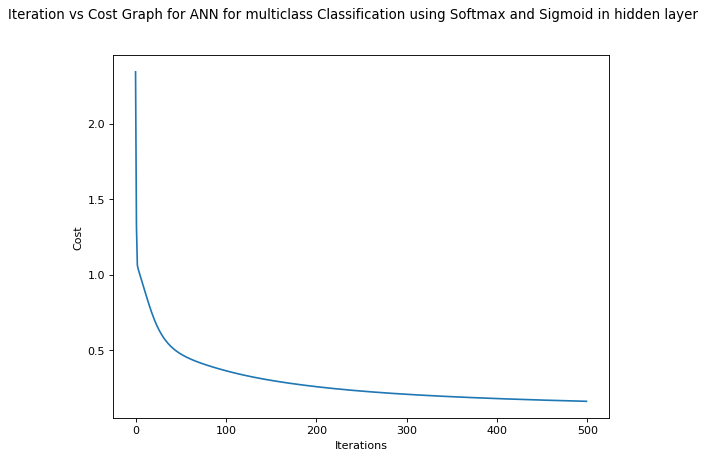

In [18]:
# Print iteration vs training cost graph and test data prediction accuracy

itr = np.arange(0,len(error_cost_sigmoid))
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
fig.suptitle('Iteration vs Cost Graph for ANN for multiclass Classification using Softmax and Sigmoid in hidden layer')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.plot(itr,error_cost_sigmoid)
from sklearn.metrics import accuracy_score
score_sigmoid = accuracy_score(o_test_sigmoid['Maximum'],o_test_sigmoid['Actual_Output'])*100
print("Accuracy For Sigmoid: ", score_sigmoid, "%")
from sklearn.metrics import f1_score
print("F1 Score is ",f1_score(o_test_sigmoid['Maximum'], o_test_sigmoid['Actual_Output'], average='macro')*100,"%")
from sklearn.metrics import confusion_matrix
labels = ['Versicolor', 'Setosa','Virginica']
confusion = confusion_matrix(o_test_sigmoid['Maximum'], o_test_sigmoid['Actual_Output'])
print(confusion)

In [12]:
# Training for Tanh activation function

features_after_addition = [c for c in iris.columns if c not in ['species_category','Setosa','Virginica','Versicolor']]
w1_tanh,w2_tanh = generate_randomWeights()
error_cost_tanh = []
learning_rate_tanh = 0.01
for i in range(0,500):
    z2_tanh,a2_tanh,z3_tanh,o_tanh = feed_forward_tanh(train_features[features_after_addition],w1_tanh,w2_tanh)
    djdw1_tanh, djdw2_tanh = back_propagate_tanh(train_features, o_tanh ,z2_tanh, z3_tanh, a2_tanh, w2_tanh)
    loss_tanh = np.sum((-train_data.loc[:,['Setosa', 'Versicolor', 'Virginica']] * np.log(o_tanh)).sum(axis=1)/len(train_features))
    error_cost_tanh.append(loss_tanh)
    w1_tanh = w1_tanh-learning_rate_tanh*djdw1_tanh
    w2_tanh = w2_tanh-learning_rate_tanh*djdw2_tanh
print(pd.DataFrame(error_cost_tanh))

            0
0    2.265544
1    1.222077
2    0.955400
3    0.903976
4    0.591385
5    0.546763
6    0.516928
7    0.498532
8    0.484149
9    0.472869
10   0.463295
11   0.454970
12   0.447511
13   0.440722
14   0.434457
15   0.428622
16   0.423147
17   0.417978
18   0.413075
19   0.408401
20   0.403931
21   0.399639
22   0.395506
23   0.391514
24   0.387649
25   0.383898
26   0.380250
27   0.376698
28   0.373235
29   0.369857
..        ...
470  0.334170
471  0.343673
472  0.333775
473  0.343263
474  0.333382
475  0.342856
476  0.332990
477  0.342451
478  0.332601
479  0.342048
480  0.332213
481  0.341648
482  0.331827
483  0.341251
484  0.331444
485  0.340856
486  0.331062
487  0.340463
488  0.330682
489  0.340073
490  0.330303
491  0.339685
492  0.329927
493  0.339300
494  0.329553
495  0.338917
496  0.329180
497  0.338537
498  0.328810
499  0.338159

[500 rows x 1 columns]


In [13]:
# Run the sigmoid model on test data

z2_tanh,a2_tanh,z3_tanh,o_test_tanh = feed_forward_tanh(test_features[features_after_addition],w1_tanh,w2_tanh)
o_test_tanh['Maximum'] = o_test_tanh[['Setosa','Versicolor','Virginica']].idxmax(axis=1)
o_test_tanh['Actual_Output'] = test_data['species_category']
o_test_tanh

,Setosa,Versicolor,Virginica,Maximum,Actual_Output
120,0.999771,0.000229,5.712915e-08,Setosa,Setosa
121,0.000609,0.726524,2.728668e-01,Versicolor,Virginica
122,0.008594,0.978725,1.268062e-02,Versicolor,Versicolor
123,0.000290,0.469814,5.298961e-01,Virginica,Virginica
124,0.999471,0.000529,1.270024e-08,Setosa,Setosa
125,0.999806,0.000193,2.703631e-07,Setosa,Setosa
126,0.999842,0.000158,2.147434e-09,Setosa,Setosa
127,0.000094,0.791227,2.086794e-01,Versicolor,Versicolor
128,0.000647,0.984695,1.465792e-02,Versicolor,Versicolor
129,0.000124,0.279410,7.204660e-01,Virginica,Virginica


Accuracy For Tanh:  86.66666666666667 %
F1 Score is  85.6060606060606 %
[[11  0  0]
 [ 0  9  4]
 [ 0  0  6]]


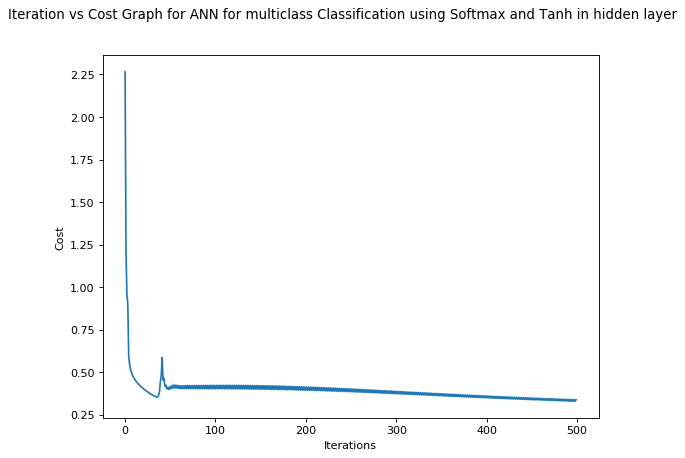

In [14]:
# Print iteration vs training cost graph and test data prediction accuracy for Tanh Activation Function

itr = np.arange(0,len(error_cost_tanh))
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
fig.suptitle('Iteration vs Cost Graph for ANN for multiclass Classification using Softmax and Tanh in hidden layer')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.plot(itr,error_cost_tanh)
from sklearn.metrics import accuracy_score
score_tanh = accuracy_score(o_test_tanh['Maximum'],o_test_tanh['Actual_Output'])*100
print("Accuracy For Tanh: ", score_tanh, "%")
from sklearn.metrics import f1_score
print("F1 Score is ",f1_score(o_test_tanh['Maximum'], o_test_tanh['Actual_Output'], average='macro')*100,"%")
from sklearn.metrics import confusion_matrix
labels = ['Versicolor', 'Setosa','Virginica']
confusion = confusion_matrix(o_test_tanh['Maximum'], o_test_tanh['Actual_Output'])
print(confusion)

In [15]:
# Training for Relu activation function

features_after_addition = [c for c in iris.columns if c not in ['species_category','Setosa','Virginica','Versicolor']]
w1_relu,w2_relu = generate_randomWeights()
error_cost_relu = []
learning_rate_relu = 0.01
for i in range(0,500):
    z2_relu,a2_relu,z3_relu,o_relu = feed_forward_relu(train_features[features_after_addition],w1_relu,w2_relu)
    djdw1_relu, djdw2_relu = back_propagate_relu(train_features, o_relu ,z2_relu, z3_relu, a2_relu, w2_relu)
    loss_relu = np.sum((-train_data.loc[:,['Setosa', 'Versicolor', 'Virginica']] * np.log(o_relu)).sum(axis=1)/len(train_features))
    error_cost_relu.append(loss_relu)
    w1_relu = w1_relu-learning_rate_relu*djdw1_relu
    w2_relu = w2_relu-learning_rate_relu*djdw2_relu
print(pd.DataFrame(error_cost_relu))

            0
0    2.525518
1    1.328426
2    1.042879
3    0.980030
4    0.937265
5    0.900651
6    0.868658
7    0.840540
8    0.815685
9    0.793620
10   0.773953
11   0.756351
12   0.740534
13   0.726264
14   0.713339
15   0.701589
16   0.690867
17   0.681048
18   0.672028
19   0.663713
20   0.656027
21   0.648901
22   0.642277
23   0.636103
24   0.630335
25   0.624934
26   0.619865
27   0.615099
28   0.610610
29   0.606372
..        ...
470  0.462450
471  0.462421
472  0.462391
473  0.462361
474  0.462332
475  0.462302
476  0.462273
477  0.462244
478  0.462215
479  0.462186
480  0.462157
481  0.462129
482  0.462100
483  0.462072
484  0.462043
485  0.462015
486  0.461987
487  0.461959
488  0.461931
489  0.461903
490  0.461875
491  0.461847
492  0.461820
493  0.461793
494  0.461765
495  0.461738
496  0.461711
497  0.461684
498  0.461657
499  0.461630

[500 rows x 1 columns]


In [16]:
# Run the Relu model on test data

z2_relu,a2_relu,z3_relu,o_test_relu = feed_forward_relu(test_features[features_after_addition],w1_relu,w2_relu)
o_test_relu['Maximum'] = o_test_relu[['Setosa','Versicolor','Virginica']].idxmax(axis=1)
o_test_relu['Actual_Output'] = test_data['species_category']
o_test_relu

,Setosa,Versicolor,Virginica,Maximum,Actual_Output
120,0.930789,0.040604,0.028608,Setosa,Setosa
121,0.000296,0.406589,0.593114,Virginica,Virginica
122,0.015677,0.583226,0.401097,Versicolor,Versicolor
123,0.000136,0.373296,0.626568,Virginica,Virginica
124,0.996863,0.002387,0.000749,Setosa,Setosa
125,0.938643,0.032899,0.028457,Setosa,Setosa
126,0.999929,0.000060,0.000011,Setosa,Setosa
127,0.000228,0.300640,0.699132,Virginica,Versicolor
128,0.030412,0.511995,0.457593,Versicolor,Versicolor
129,0.000004,0.244130,0.755865,Virginica,Virginica


Accuracy For Relu:  83.33333333333334 %
F1 Score is  80.51282051282053 %
[[11  0  0]
 [ 0  4  0]
 [ 0  5 10]]


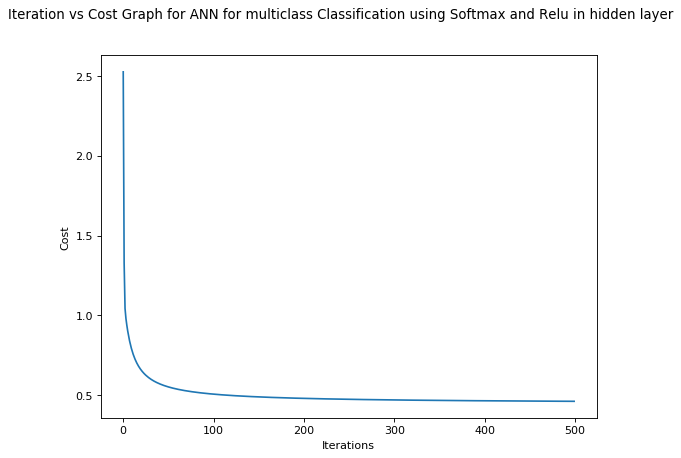

In [17]:
# Print iteration vs training cost graph and test data prediction accuracy for Relu Activation Function

itr = np.arange(0,len(error_cost_relu))
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
fig.suptitle('Iteration vs Cost Graph for ANN for multiclass Classification using Softmax and Relu in hidden layer')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.plot(itr,error_cost_relu)
from sklearn.metrics import accuracy_score
score_relu = accuracy_score(o_test_relu['Maximum'],o_test_relu['Actual_Output'])*100
print("Accuracy For Relu: ", score_relu, "%")
o_test_relu
from sklearn.metrics import f1_score
print("F1 Score is ",f1_score(o_test_relu['Maximum'], o_test_relu['Actual_Output'], average='macro')*100,"%")
from sklearn.metrics import confusion_matrix
labels = ['Versicolor', 'Setosa','Virginica']
confusion = confusion_matrix(o_test_relu['Maximum'], o_test_relu['Actual_Output'])
print(confusion)